1. Remove any data that is not relevant to the patient’s ALS condition.
2. Apply a standard scalar to the data.
3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
6. Fit a PCA transformation with two features to the scaled data.
7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.
8. Summarize your results and make a conclusion.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('als_data.csv')

In [4]:
df.shape

(2223, 101)

In [5]:
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [6]:
print(df.columns.tolist())


['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_ra

## 1. Remove any data that is not relevant to the patient’s ALS condition.

In [8]:
#placeholder comment, did the bare minmum just to get moving on the project
df = df.drop(['ID','SubjectID'],axis=1)

In [9]:
df.shape

(2223, 99)

In [10]:
#drop any null rows
df.dropna(inplace=True)

## 2. Apply a standard scalar to the data.

In [12]:

#it appears the previous step was unessisary 
df.shape



(2223, 99)

In [13]:
#store the value of the collumns for the next step
columns =  df.columns

In [14]:
#scale the data using standard scaler
from sklearn.preprocessing import StandardScaler



sc = StandardScaler()
scaled_data = sc.fit_transform(df)
#convert the resulting array back into a df
scaled_data = pd.DataFrame(scaled_data,columns = columns)




In [15]:
#verifying the scaler worked
scaled_data.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.992342,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-1.198812,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.595291,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,-0.639992,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,-0.081171,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151


## 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [17]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
# Instantiate model
#kmeans3 = KMeans(n_clusters=3, random_state=42)

In [19]:
#kmeans3.fit(scaled_data)

In [20]:
# Create a list from 2-10. 
num_clusters = [i for i in range(2, 11)]

#run models with k values of 2-10 and 
def kmeans_inertia(num_clusters, x_vals):


    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [21]:
inertia = kmeans_inertia(num_clusters, scaled_data)
#inertia

C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\kings\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kings\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


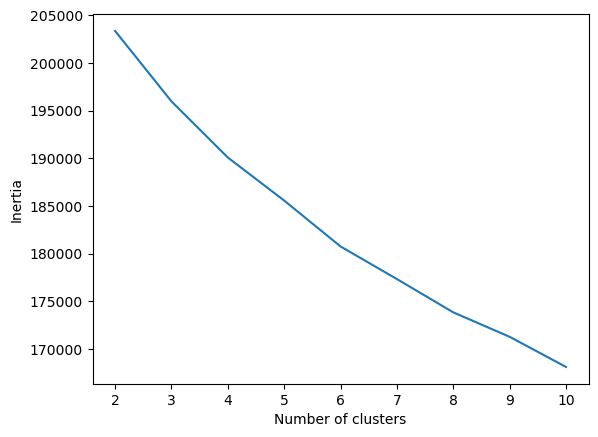

In [22]:
# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

## 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

In [24]:
#it looks like the elbow is at 3 or 6 I'm going to use 6 for this dataset

## 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [26]:
#initiate and fit the model with 6 clusters
kmeans6 = KMeans(n_clusters=6,init= 'k-means++',random_state=42)

In [27]:
kmeans6.fit(scaled_data)

C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

## 6. Fit a PCA transformation with two features to the scaled data.

In [29]:

scaled_data.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.992342,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-1.198812,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.595291,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,-0.639992,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,-0.081171,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151


In [30]:
from sklearn.decomposition import PCA

In [31]:
#iniciate our pca with 2 componenets, fit/transform the scaled data we produced in the previous stps
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

In [32]:
#fit out kmeans model to account for the reduced features
kmeans6.fit(df_pca)
df_pca

C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


array([[-1.42672274, -2.31776516],
       [-1.44022628, -4.87120367],
       [ 1.61786232, -0.42936821],
       ...,
       [-0.43293804,  4.24665287],
       [-0.33079143,  3.31552052],
       [ 1.46803314,  0.57897517]])

In [33]:
#verify the cluster count and features appear to be correct
kmeans6.cluster_centers_.shape



(6, 2)

## 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [35]:
#store the prediction in a label variable
label = kmeans6.predict(df_pca)

In [36]:
# Convert to a data frame, create a simplified view that shows the cluster variable for each row
reduceddf = pd.DataFrame(df_pca,  columns=['PC1','PC2'])
reduceddf['cluster'] = label
reduceddf.head()

,PC1,PC2,cluster
0,-1.426723,-2.317765,3
1,-1.440226,-4.871204,3
2,1.617862,-0.429368,2
3,-1.919998,2.096873,5
4,0.297690,0.166131,2


In [37]:



centres_reduced = kmeans6.cluster_centers_

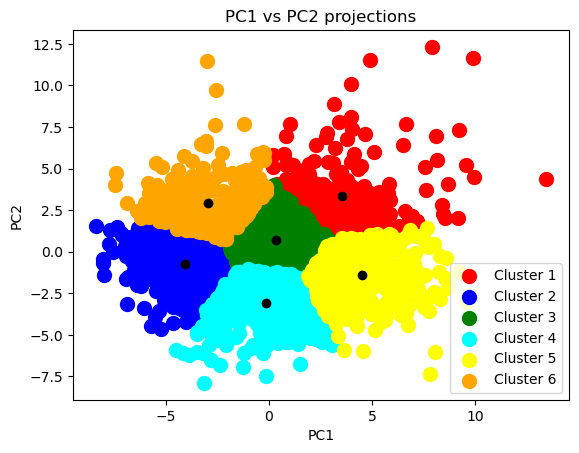

In [38]:
#create a scatter plot for each of the clusters


plt.scatter(df_pca[label == 0, 0], df_pca[label == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_pca[label == 1, 0], df_pca[label == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_pca[label == 2, 0], df_pca[label == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_pca[label == 3, 0], df_pca[label == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df_pca[label == 4, 0], df_pca[label == 4, 1], s=100, c='yellow', label='Cluster 5')
plt.scatter(df_pca[label == 5, 0], df_pca[label == 5, 1], s=100, c='orange', label='Cluster 6')
plt.scatter(centres_reduced[:,0], centres_reduced[:,1] , c='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 projections')
plt.legend()


## 8. Summarize your results and make a conclusion.

In [40]:
#we see some outlier values that fall outside the ovverall cluster of points.  Most of these appear to fall in cluster 1 but cluster 6,4 and 5 have some as well. With this data all appreaing in one large cluster it shows that this analysis does not display any clear grouping.  I would venture to say this may be why our elbow chart was relativly straignt
